In [27]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


In [28]:
print('DOTSCIENCE_INPUTS=["agent1", "agent2"]')
print('DOTSCIENCE_OUTPUTS=["model"]')
print('DOTSCIENCE_LABELS={"model_type": "random_forest"}')


DOTSCIENCE_INPUTS=["agent1", "agent2"]
DOTSCIENCE_OUTPUTS=["model"]
DOTSCIENCE_LABELS={"model_type": "random_forest"}


We are using a housing price dataset sourced from Bay Area Home Sales Database and Zillow. This dataset was based on the homes sold between January 2013 and December 2015. 

In [29]:
inputs = [pd.read_csv('./agent1/bay_area_zillow_agent1.csv'), pd.read_csv('./agent2/bay_area_zillow_agent2.csv')]
df = pd.concat(f for f in inputs)

In [30]:
# randomise my dataframe rows to remove any ordering in the data
# TODO fix seed to preserve reproducibility
df = df.sample(frac=1).reset_index(drop=True)


In [31]:
df.describe(include = "all")

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
count,11330.000000,11330,11330,11330,11330.000000,11330.000000,11330.000000,11330,1.133000e+04,11330.000000,11330.000000,11330,11330.000000,11330,11330.000000,1.133000e+04,1.133000e+04,11330.000000,1.133000e+04
unique,NaN,10730,11232,10684,NaN,NaN,NaN,954,NaN,NaN,NaN,71,NaN,10,NaN,NaN,NaN,NaN,NaN
top,NaN,Address: 1300 Eddy Street,San FranciscoSales price: 850000Sales date: 02...,1300 Eddy St,NaN,NaN,NaN,08/30/2013,NaN,NaN,NaN,Mission,NaN,SingleFamily,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,3,5,NaN,NaN,NaN,46,NaN,NaN,NaN,540,NaN,5803,NaN,NaN,NaN,NaN,NaN
mean,9171.729214,NaN,NaN,NaN,1.980229,2.614475,1585.420918,NaN,1.263928e+06,37.759711,-122.436518,NaN,6.111562,NaN,1948.498147,1.565695e+06,1.320205e+06,94116.912004,3.689973e+07
std,4921.941074,NaN,NaN,NaN,1.047358,1.299457,921.978245,NaN,1.042079e+06,0.025578,0.030743,NaN,12.125819,NaN,37.911196,1.229417e+06,5.848170e+05,9.400877,7.800741e+07
min,2.000000,NaN,NaN,NaN,0.500000,0.000000,1.000000,NaN,5.350000e+02,37.708170,-122.510726,NaN,1.000000,NaN,1860.000000,4.323850e+05,6.881000e+05,94102.000000,1.506329e+07
25%,5039.750000,NaN,NaN,NaN,1.000000,2.000000,1019.000000,NaN,7.292500e+05,37.739286,-122.455157,NaN,4.000000,NaN,1916.000000,9.052375e+05,9.829000e+05,94110.000000,1.510847e+07
50%,9198.500000,NaN,NaN,NaN,2.000000,2.000000,1362.000000,NaN,9.900000e+05,37.760513,-122.432510,NaN,5.000000,NaN,1940.000000,1.230758e+06,1.211900e+06,94115.000000,1.515697e+07
75%,13374.750000,NaN,NaN,NaN,2.000000,3.000000,1876.000000,NaN,1.450000e+06,37.781386,-122.413359,NaN,7.000000,NaN,1986.000000,1.731170e+06,1.480400e+06,94123.000000,5.970040e+07


In [32]:
df.columns

Index(['Unnamed: 0', 'address', 'info', 'z_address', 'bathrooms', 'bedrooms',
       'finishedsqft', 'lastsolddate', 'lastsoldprice', 'latitude',
       'longitude', 'neighborhood', 'totalrooms', 'usecode', 'yearbuilt',
       'zestimate', 'zindexvalue', 'zipcode', 'zpid'],
      dtype='object')

In [33]:
# drop unneeded columns
df.drop(df.columns[[0, 1, 2, 3, 11, 13, 14, 15, 16, 17, 18]], axis=1, inplace=True)

In [34]:
df.describe(include = "all")

,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,totalrooms
count,11330.000000,11330.000000,11330.000000,11330,1.133000e+04,11330.000000,11330.000000,11330.000000
unique,NaN,NaN,NaN,954,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,08/30/2013,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,46,NaN,NaN,NaN,NaN
mean,1.980229,2.614475,1585.420918,NaN,1.263928e+06,37.759711,-122.436518,6.111562
std,1.047358,1.299457,921.978245,NaN,1.042079e+06,0.025578,0.030743,12.125819
min,0.500000,0.000000,1.000000,NaN,5.350000e+02,37.708170,-122.510726,1.000000
25%,1.000000,2.000000,1019.000000,NaN,7.292500e+05,37.739286,-122.455157,4.000000
50%,2.000000,2.000000,1362.000000,NaN,9.900000e+05,37.760513,-122.432510,5.000000
75%,2.000000,3.000000,1876.000000,NaN,1.450000e+06,37.781386,-122.413359,7.000000


In [35]:
# check none of our data is null or NaN
df.isnull().any()

bathrooms        False
bedrooms         False
finishedsqft     False
lastsolddate     False
lastsoldprice    False
latitude         False
longitude        False
totalrooms       False
dtype: bool

In [36]:
df.dtypes


bathrooms        float64
bedrooms           int64
finishedsqft       int64
lastsolddate      object
lastsoldprice      int64
latitude         float64
longitude        float64
totalrooms         int64
dtype: object

In [37]:
df['bathrooms'] = df['bathrooms'].astype('int64', copy=False)
df['lastsolddate'] = pd.to_datetime(df['lastsolddate'])


In [38]:
df.dtypes

bathrooms                 int64
bedrooms                  int64
finishedsqft              int64
lastsolddate     datetime64[ns]
lastsoldprice             int64
latitude                float64
longitude               float64
totalrooms                int64
dtype: object

We hypothesise that `finishedsqft`, `bathrooms` and `bedrooms` are positively correlated with `lastsoldprice`. Let's plot these to see.

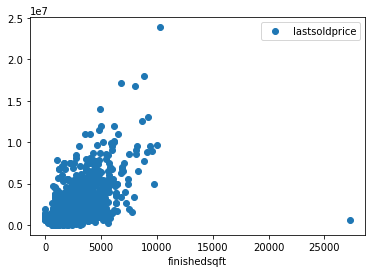

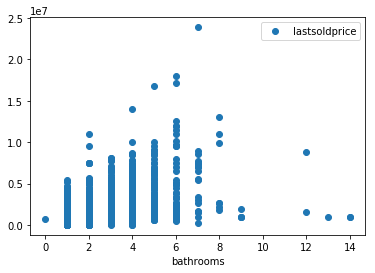

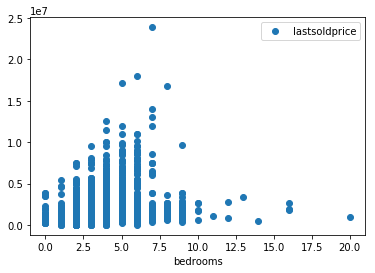

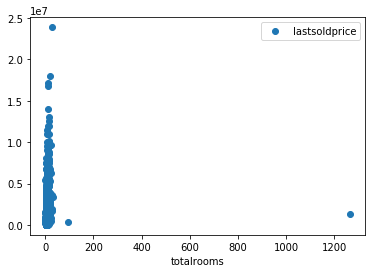

In [39]:
df.plot(x='finishedsqft', y='lastsoldprice', style='o')
df.plot(x='bathrooms', y='lastsoldprice', style='o')
df.plot(x='bedrooms', y='lastsoldprice', style='o')
df.plot(x='totalrooms', y='lastsoldprice', style='o')

Now let's try a random forest model on those features to predict `lastsoldprice`

In [40]:
X = df[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'longitude', 'latitude']]
Y = df['lastsoldprice']

In [41]:
features = df.columns

In [42]:
# These are our features:
features

Index(['bathrooms', 'bedrooms', 'finishedsqft', 'lastsolddate',
       'lastsoldprice', 'latitude', 'longitude', 'totalrooms'],
      dtype='object')

In [57]:
# Split data into test and training set. Use random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 12, 14], 'max_features': [1,2, 3, 4, 5, 6], 'bootstrap': [False]}
]

rand_forest_regressor = RandomForestRegressor()

# grid_search = GridSearchCV(rand_forest_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# grid_search.fit(X_train, y_train)

In [58]:
rand_forest_regressor.get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [62]:
grid_search = GridSearchCV(rand_forest_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')


[{'bootstrap': False, 'max_features': 1, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 1, 'n_estimators': 10},
 {'bootstrap': False, 'max_features': 1, 'n_estimators': 12},
 {'bootstrap': False, 'max_features': 1, 'n_estimators': 14},
 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10},
 {'bootstrap': False, 'max_features': 2, 'n_estimators': 12},
 {'bootstrap': False, 'max_features': 2, 'n_estimators': 14},
 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10},
 {'bootstrap': False, 'max_features': 3, 'n_estimators': 12},
 {'bootstrap': False, 'max_features': 3, 'n_estimators': 14},
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10},
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 12},
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 14},
 {'bootstrap

In [ ]:
#rand_forest_regressor.fit(X_train, y_train)

In [65]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 12, 14], 'max_features': [1, 2, 3, 4, 5, 6], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [70]:
for param_dict in grid_search.cv_results_['params']:
    for key in param_dict:
        print(key, param_dict[key])
        
        

bootstrap False
max_features 1
n_estimators 3
bootstrap False
max_features 1
n_estimators 10
bootstrap False
max_features 1
n_estimators 12
bootstrap False
max_features 1
n_estimators 14
bootstrap False
max_features 2
n_estimators 3
bootstrap False
max_features 2
n_estimators 10
bootstrap False
max_features 2
n_estimators 12
bootstrap False
max_features 2
n_estimators 14
bootstrap False
max_features 3
n_estimators 3
bootstrap False
max_features 3
n_estimators 10
bootstrap False
max_features 3
n_estimators 12
bootstrap False
max_features 3
n_estimators 14
bootstrap False
max_features 4
n_estimators 3
bootstrap False
max_features 4
n_estimators 10
bootstrap False
max_features 4
n_estimators 12
bootstrap False
max_features 4
n_estimators 14
bootstrap False
max_features 5
n_estimators 3
bootstrap False
max_features 5
n_estimators 10
bootstrap False
max_features 5
n_estimators 12
bootstrap False
max_features 5
n_estimators 14
bootstrap False
max_features 6
n_estimators 3
bootstrap False
max

In [76]:
#print(grid_search.cv_results_)
grid_search.cv_results_['params']

[{'bootstrap': False, 'max_features': 1, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 1, 'n_estimators': 10},
 {'bootstrap': False, 'max_features': 1, 'n_estimators': 12},
 {'bootstrap': False, 'max_features': 1, 'n_estimators': 14},
 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10},
 {'bootstrap': False, 'max_features': 2, 'n_estimators': 12},
 {'bootstrap': False, 'max_features': 2, 'n_estimators': 14},
 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10},
 {'bootstrap': False, 'max_features': 3, 'n_estimators': 12},
 {'bootstrap': False, 'max_features': 3, 'n_estimators': 14},
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10},
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 12},
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 14},
 {'bootstrap

In [78]:
grid_search.cv_results_

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([ 0.02670035,  0.07218471,  0.0794826 ,  0.09442725,  0.03206363,
         0.09923239,  0.11128678,  0.13725066,  0.04301653,  0.13199544,
         0.17645354,  0.19107656,  0.05362077,  0.16885095,  0.21285925,
         0.23253999,  0.06591096,  0.21372252,  0.23496523,  0.26321697,
         0.06686144,  0.22868457,  0.28511877,  0.33475099]),
 'std_fit_time': array([ 0.0027579 ,  0.00708657,  0.00544732,  0.00600505,  0.00313444,
         0.00198584,  0.0021343 ,  0.00471558,  0.00172394,  0.00476192,
         0.01372714,  0.01207889,  0.00258355,  0.00605446,  0.00831972,
         0.00932508,  0.00374727,  0.0087858 ,  0.00829984,  0.00423302,
         0.00184826,  0.00382915,  0.02120295,  0.01036391]),
 'mean_score_time': array([ 0.00182452,  0.00407996,  0.00453982,  0.00528498,  0.00177431,
         0.00419474,  0.00507927,  0.00540996,  0.00154238,  0.00390286,
         0.00559421,  0.005477  ,  0.00178895,  0.0042151 ,  0.00505462,
         0.00534844, 

In [47]:
print()

In [ ]:
grid_search.best_params_

In [64]:
y_pred = grid_search.predict(X_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
#rand_forest_regressor.score(X_test, y_test)

In [50]:
grid_search.score(X_test, y_test)

-387803891893.90759

In [55]:
from sklearn.metrics import classification_report


classification_report(y_test, y_pred)

ValueError: Mix type of y not allowed, got types {'multiclass', 'continuous'}

In [51]:
print('Linear Regression coefficient of determination (R squared): %.4f' % (0 - grid_search.score(X_test, y_test))) # since score is negative

Linear Regression coefficient of determination (R squared): 387803891893.9076


In [ ]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

In [ ]:
print('DOTSCIENCE_PARAMETERS=' + json.dumps({"features": ", ".join(sorted(features))}))


print('DOTSCIENCE_SUMMARY=' + json.dumps({"lin_rmse": lin_rmse, "regressor_score": regressor_score}))